- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [1]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final_4yrs_su


In [2]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

In [4]:
import warnings
warnings.filterwarnings('ignore')

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [5]:
directory_name = 'Case1_su_cv_rw.demo'
cf_name = 'Case1_su_cv_cf_v1_rw' # Control file name

In [6]:
directory_name

'Case1_su_cv_rw.demo'

In [7]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs_su'

#### b. Parameter Sensitivity 

In [8]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
iteration,,,,,,,,,,,,,,,,,,,,,
1,0.000015,0.000268,4.510490e-07,9.258100e-07,0.000011,0.00001,0.000003,9.752840e-07,0.000004,3.596420e-07,...,1.114740e-07,0.000002,3.787930e-08,0.000004,0.000004,791.851,578724,9.802950e-11,2.247140e-10,1.541900e-09
2,0.000041,0.000276,6.504300e-07,9.947730e-07,0.000011,0.00001,0.000004,9.256230e-07,0.000004,3.963770e-07,...,1.344810e-07,0.000002,8.215720e-08,0.000004,0.000004,4196.670,587009,1.304520e-10,2.172390e-10,4.019380e-09
3,0.000158,0.000329,1.791260e-06,1.193860e-06,0.000011,0.00001,0.000004,1.093700e-06,0.000004,4.402030e-07,...,1.568450e-07,0.000002,9.604300e-08,0.000005,0.000005,4579.960,804846,4.389120e-08,2.079640e-08,1.318230e-08
4,0.000158,0.000331,1.791480e-06,1.196340e-06,0.000011,0.00001,0.000004,1.099520e-06,0.000004,4.365380e-07,...,1.530810e-07,0.000002,9.199460e-08,0.000005,0.000005,3876.270,838706,4.389410e-08,2.079840e-08,1.331680e-08


In [9]:
len(sen_iteration)

4

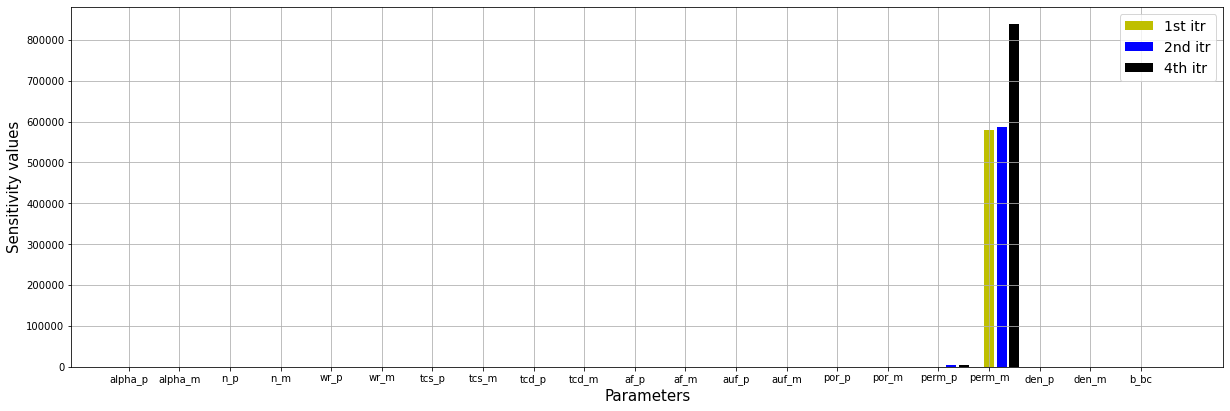

In [10]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(21) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[3,:], color='k', label='4th itr', width=0.2)
#ax.bar(X + 0.75, sen_iteration.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

##### Relative sensitivity values of all parameters

In [11]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = sen_iteration.iloc[i,:]/relative_set_itr.iloc[i,:].max()

relative_set_itr.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
iteration,,,,,,,,,,,,,,,,,,,,,
1,2.616498e-11,4.630325e-10,7.793853e-13,1.599744e-12,1.926497e-11,1.678313e-11,5.831381e-12,1.685232e-12,6.225299e-12,6.214396e-13,...,1.926203e-13,2.926542e-12,6.545313e-14,7.011546e-12,7.279273e-12,0.001368,1,1.693890e-16,3.882922e-16,2.664310e-15
2,6.974339e-11,4.695260e-10,1.108041e-12,1.694647e-12,1.877586e-11,1.668836e-11,6.164522e-12,1.576846e-12,6.299120e-12,6.752486e-13,...,2.290953e-13,2.801780e-12,1.399590e-13,7.114065e-12,7.122003e-12,0.007149,1,2.222317e-16,3.700778e-16,6.847220e-15
3,1.963804e-10,4.087912e-10,2.225593e-12,1.483340e-12,1.329198e-11,1.230085e-11,4.639409e-12,1.358894e-12,4.366140e-12,5.469407e-13,...,1.948758e-13,2.187313e-12,1.193309e-13,5.760133e-12,6.531361e-12,0.005690,1,5.453366e-14,2.583898e-14,1.637866e-14
4,1.885738e-10,3.941119e-10,2.136005e-12,1.426412e-12,1.275656e-11,1.180739e-11,4.450177e-12,1.310972e-12,4.195928e-12,5.204899e-13,...,1.825205e-13,2.098340e-12,1.096864e-13,5.528528e-12,6.262886e-12,0.004622,1,5.233550e-14,2.479820e-14,1.587779e-14


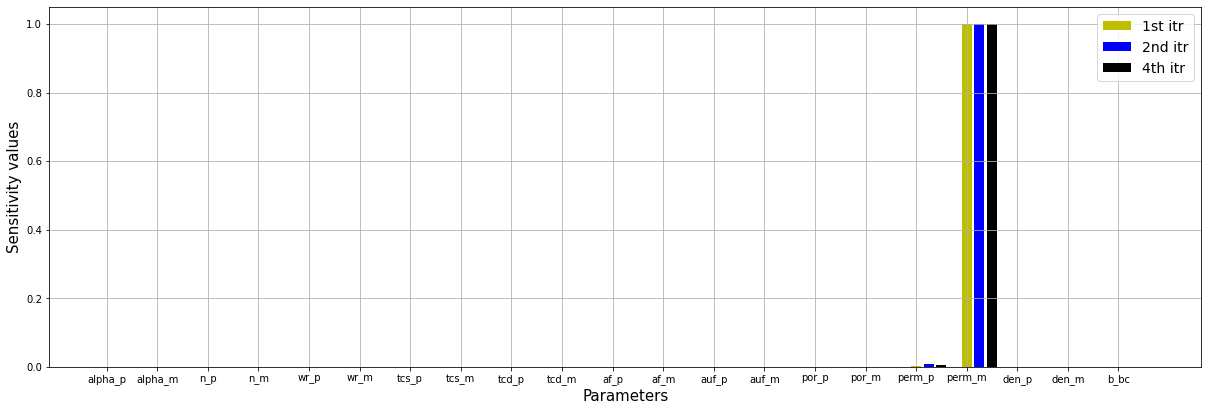

In [12]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(21) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[3,:], color='k', label='4th itr', width=0.2)
#ax.bar(X + 0.75, relative_set_itr.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

### Plotting the change in parameters:


In [13]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
iteration,,,,,,,,,,,,,,,,,,,,,
0,0.010000,0.001825,2.05000,2.05000,0.224324,0.159488,0.439577,0.952105,0.101023,0.984405,...,1.49939,0.486935,0.698884,0.637395,0.481031,5.346620e-11,1.000000e-13,900,1900,268.45
1,0.005692,0.001798,2.04984,2.05001,0.226657,0.160728,0.441024,0.951940,0.102463,0.984320,...,1.49940,0.486314,0.698884,0.638052,0.481361,1.336660e-11,1.222390e-13,900,1900,268.45
2,0.002500,0.001814,2.04969,2.05003,0.228023,0.161782,0.442337,0.951793,0.103700,0.984239,...,1.49941,0.485737,0.698884,0.638408,0.481638,1.336660e-11,1.187990e-13,900,1900,268.45
3,0.002500,0.001814,2.04969,2.05003,0.228023,0.161782,0.442337,0.951793,0.103700,0.984239,...,1.49941,0.485737,0.698884,0.638408,0.481638,1.336660e-11,1.187990e-13,900,1900,268.45
4,0.002500,0.001814,2.04969,2.05003,0.228023,0.161782,0.442337,0.951793,0.103700,0.984239,...,1.49941,0.485737,0.698884,0.638408,0.481638,1.336660e-11,1.187990e-13,900,1900,268.45


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [14]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
iteration,,,,,,,,,,,,,,,,,,,,,
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0,0,0.0
1,-43.0755,-1.476237,-0.007805,0.000488,1.040014,0.777488,0.329180,-0.017330,1.425418,-0.008635,...,0.000667,-0.127532,0.0,0.103076,0.068603,-74.999906,22.239,0,0,0.0
2,-75.0000,-0.608249,-0.015122,0.001463,1.648954,1.438353,0.627876,-0.032769,2.649892,-0.016863,...,0.001334,-0.246029,0.0,0.158928,0.126187,-74.999906,18.799,0,0,0.0
3,-75.0000,-0.608249,-0.015122,0.001463,1.648954,1.438353,0.627876,-0.032769,2.649892,-0.016863,...,0.001334,-0.246029,0.0,0.158928,0.126187,-74.999906,18.799,0,0,0.0
4,-75.0000,-0.608249,-0.015122,0.001463,1.648954,1.438353,0.627876,-0.032769,2.649892,-0.016863,...,0.001334,-0.246029,0.0,0.158928,0.126187,-74.999906,18.799,0,0,0.0


#### Line plot of all parameter values


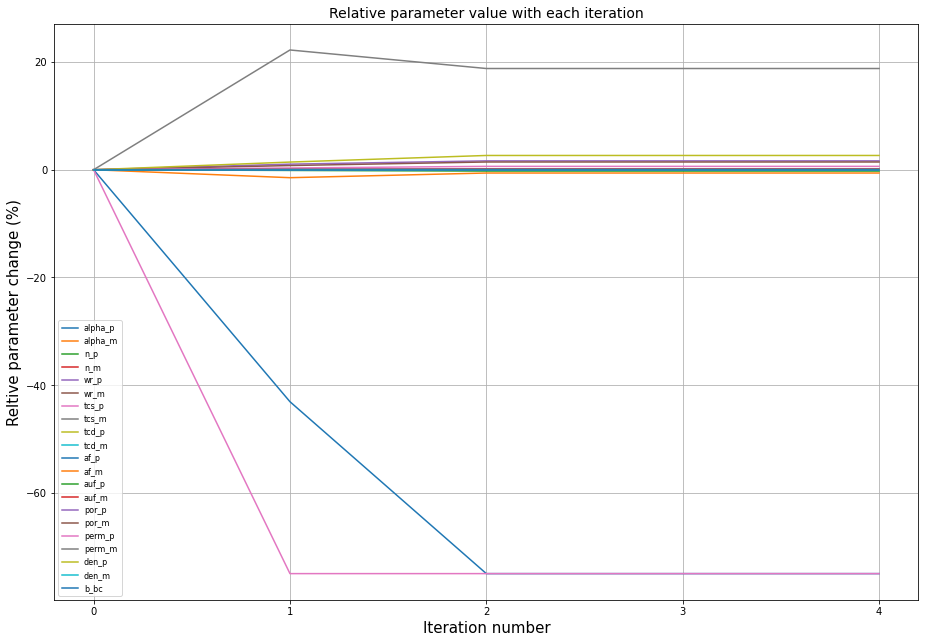

In [15]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments: Some of the parameters would like to vary more - Do we give them the oppurtunity?** 

### c. Objective function

In [16]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([1, 2, 3, 4])

In [17]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,260.6422,258.367326,2.274874,0.000231
1,stemp_0.04_1,temp,261.2884,260.931324,0.357076,0.000231
2,stemp_0.04_2,temp,261.3255,260.905613,0.419887,0.000231
3,stemp_0.04_3,temp,261.1522,260.766218,0.385982,0.000231
4,stemp_0.04_4,temp,260.7784,260.405222,0.373178,0.000231


#### Analyzing the residual weights:


In [18]:
res_1['Weight'].describe()

count    15344.000000
mean         0.000139
std          0.000092
min          0.000047
25%          0.000047
50%          0.000139
75%          0.000231
max          0.000231
Name: Weight, dtype: float64

In [19]:
res_1['Weight'].unique()

array([2.310180e-04, 4.702886e-05])

In [20]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [21]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,258.367326,2.274874,0.000231,0.000526,2.274874,0.000526,2.761890e-07,0.008007
1,stemp_0.04_1,temp,261.2884,260.931324,0.357076,0.000231,0.000082,0.357076,0.000082,6.804747e-09,0.000197
2,stemp_0.04_2,temp,261.3255,260.905613,0.419887,0.000231,0.000097,0.419887,0.000097,9.409268e-09,0.000273
3,stemp_0.04_3,temp,261.1522,260.766218,0.385982,0.000231,0.000089,0.385982,0.000089,7.951057e-09,0.000231
4,stemp_0.04_4,temp,260.7784,260.405222,0.373178,0.000231,0.000086,0.373178,0.000086,7.432314e-09,0.000215


In [22]:
res_phi_1['Weighted_Sq_Residual'].mean()

2.2479548534799886e-07

In [23]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,2.247955
2,2.110497
3,2.110426
4,2.110426


In [24]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [25]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration.head()

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.003564,0.003564,0,0.001782,0.001782
1,32,0.003449,0.003449,0,0.001765,0.001685
2,63,0.003238,0.003238,0,0.001732,0.001507
3,115,0.003238,0.003238,0,0.001732,0.001507
4,167,0.003238,0.003238,0,0.001732,0.001507


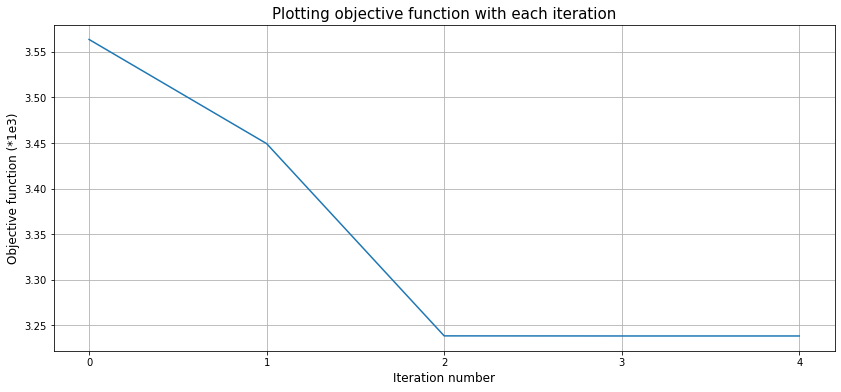

<Figure size 720x432 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments:**

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [27]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

3

In [28]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,258.367326,2.274874,0.000231,0.000526,2.274874,0.000526,2.761890e-07,0.008529
1,stemp_0.04_1,temp,261.2884,260.919580,0.368820,0.000231,0.000085,0.368820,0.000085,7.259713e-09,0.000224
2,stemp_0.04_2,temp,261.3255,260.884017,0.441483,0.000231,0.000102,0.441483,0.000102,1.040208e-08,0.000321
3,stemp_0.04_3,temp,261.1522,260.738655,0.413545,0.000231,0.000096,0.413545,0.000096,9.127173e-09,0.000282
4,stemp_0.04_4,temp,260.7784,260.371823,0.406577,0.000231,0.000094,0.406577,0.000094,8.822227e-09,0.000272


In [29]:
np.int(len(res_best)/2)

7672

In [30]:
temp_measured = res_best.iloc[:np.int(len(res_best)/2),2] # The 2nd column contains the measured values and we have only temperature values from the first half of the values
mois_measured = res_best.iloc[np.int(len(res_best)/2):,2]

temp_sim = res_best.iloc[:np.int(len(res_best)/2),3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[np.int(len(res_best)/2):,3]

temp_res = res_best.iloc[:np.int(len(res_best)/2),4] # The 4th column contains the residual values 
mois_res = res_best.iloc[np.int(len(res_best)/2):,4]

In [31]:
res_best.iloc[:np.int(len(res_best)/(2*7)),:].tail()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
1091,stemp_0.04_1091,temp,257.3359,257.327620,0.008280,0.000231,0.000002,0.008280,0.000002,3.659043e-12,1.129949e-07
1092,stemp_0.04_1092,temp,257.1298,257.423342,-0.293542,0.000231,-0.000068,0.293542,0.000068,4.598680e-09,1.420118e-04
1093,stemp_0.04_1093,temp,256.7739,257.059128,-0.285228,0.000231,-0.000066,0.285228,0.000066,4.341871e-09,1.340813e-04
1094,stemp_0.04_1094,temp,256.4260,256.350206,0.075794,0.000231,0.000018,0.075794,0.000018,3.065926e-10,9.467883e-06
1095,stemp_0.04_1095,temp,256.6415,257.139416,-0.497916,0.000231,-0.000115,0.497916,0.000115,1.323133e-08,4.085967e-04


In [32]:
res_best.iloc[:np.int(len(res_best)/(2*7)),3].head()

0    258.367326
1    260.919580
2    260.884017
3    260.738655
4    260.371823
Name: Modelled, dtype: float64

### Importing the measured data:

In [33]:
#### Extracting the measured data
Yakou_measured_data = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv', sep='\t',index_col='TIMESTAMP')
Yakou_measured_data.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [34]:
# Calculating the temperature in Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

times = np.arange(1, time_values+1, 1)

# Adding column information:


x = 0
for i, depth in enumerate(depths):
        Yakou_measured_data[f'Soil temperature at - {depth} m (K)'] = Yakou_measured_data[f'Soil temperature at - {depth} m (°C)'] + 273.15

Yakou_measured_data['Soil temperature at - 0.04 m (K)'].head()

TIMESTAMP
2016-01-01    260.642153
2016-01-02    261.288403
2016-01-03    261.325486
2016-01-04    261.152153
2016-01-05    260.778403
Name: Soil temperature at - 0.04 m (K), dtype: float64

In [35]:
#depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

#depth_peat = 0.3

#poro_peat = 6.3739496E-01

#poro_mineral = 4.8103077E-01

#for i, depth in enumerate(depths):
    #if depth < depth_peat:
        #Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    #else:
        #Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

In [36]:
Yakou_measured_data.index = pd.to_datetime(Yakou_measured_data.index)

In [37]:
Yakou_measured_data.columns

Index(['Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 m (°C)',
       'Soil temperature at - 0.2 m (°C)', 'Soil temperature at - 0.4 m (°C)',
       'Soil temperature at - 0.8 m (°C)', 'Soil temperature at - 1.2 m (°C)',
       'Soil temperature at - 1.6 m (°C)', 'Soil temperature at - 0.04 m (K)',
       'Soil temperature at - 0.1 m (K)', 'Soil temperature at - 0.2 m (K)',
       'Soil temperature at - 0.4 m (K)', 'Soil temperature at - 0.8 m (K)',
       'Soil temperature at - 1.2 m (K)', 'Soil temperature at - 1.6 m (K)'],
      dtype='object')

In [38]:
Yakou_mesdata_concise = Yakou_measured_data[['Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.04 m (K)',
       'Soil temperature at - 0.1 m (K)', 'Soil temperature at - 0.2 m (K)',
       'Soil temperature at - 0.4 m (K)', 'Soil temperature at - 0.8 m (K)',
       'Soil temperature at - 1.2 m (K)', 'Soil temperature at - 1.6 m (K)']]

### Defining a new dataframe to store the simulated results!

In [39]:
case1_best_sim = pd.DataFrame(index=Yakou_mesdata_concise.index, columns=Yakou_mesdata_concise.columns)

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

#times = np.arange(1, time_values+1, 1)


x = 0

for i, depth in enumerate(depths):
    for j in np.arange(time_values):
        case1_best_sim[f'Soil temperature at - {depth} m (K)'][j] = res_best.iloc[x,3]
        case1_best_sim[f'Soil moisture at - {depth} m (%)'][j] = res_best.iloc[x + np.int(len(res_best)/2),3]
        x = x + 1
        #print(j)
#print(x)

case1_best_sim.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.04 m (K),Soil temperature at - 0.1 m (K),Soil temperature at - 0.2 m (K),Soil temperature at - 0.4 m (K),Soil temperature at - 0.8 m (K),Soil temperature at - 1.2 m (K),Soil temperature at - 1.6 m (K)
TIMESTAMP,,,,,,,,,,,,,,
2016-01-01,14.557473,14.557505,14.557554,7.792492,7.792621,7.792808,7.79302,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169
2016-01-02,14.557534,14.557552,14.557591,7.792518,7.792621,7.79279,7.792988,260.91958,261.479633,262.575858,263.377268,264.988657,266.717971,267.982117
2016-01-03,14.557533,14.557564,14.557608,7.792536,7.792628,7.792781,7.792964,260.884017,261.842497,262.988601,263.71296,265.084283,266.640659,267.853045
2016-01-04,14.557529,14.557566,14.557616,7.792547,7.792635,7.792775,7.792944,260.738655,261.91105,263.17225,263.905681,265.171877,266.594453,267.746981
2016-01-05,14.557519,14.557561,14.557617,7.792552,7.79264,7.792771,7.792929,260.371823,261.774261,263.20101,263.987793,265.230793,266.562887,267.659292


In [40]:
case1_best_sim.index = pd.to_datetime(case1_best_sim.index)
Yakou_mesdata_concise.index = pd.to_datetime(Yakou_mesdata_concise.index)

In [41]:
case1_best_sim.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=1096, freq=None)

Text(0.5, 0, 'Days')

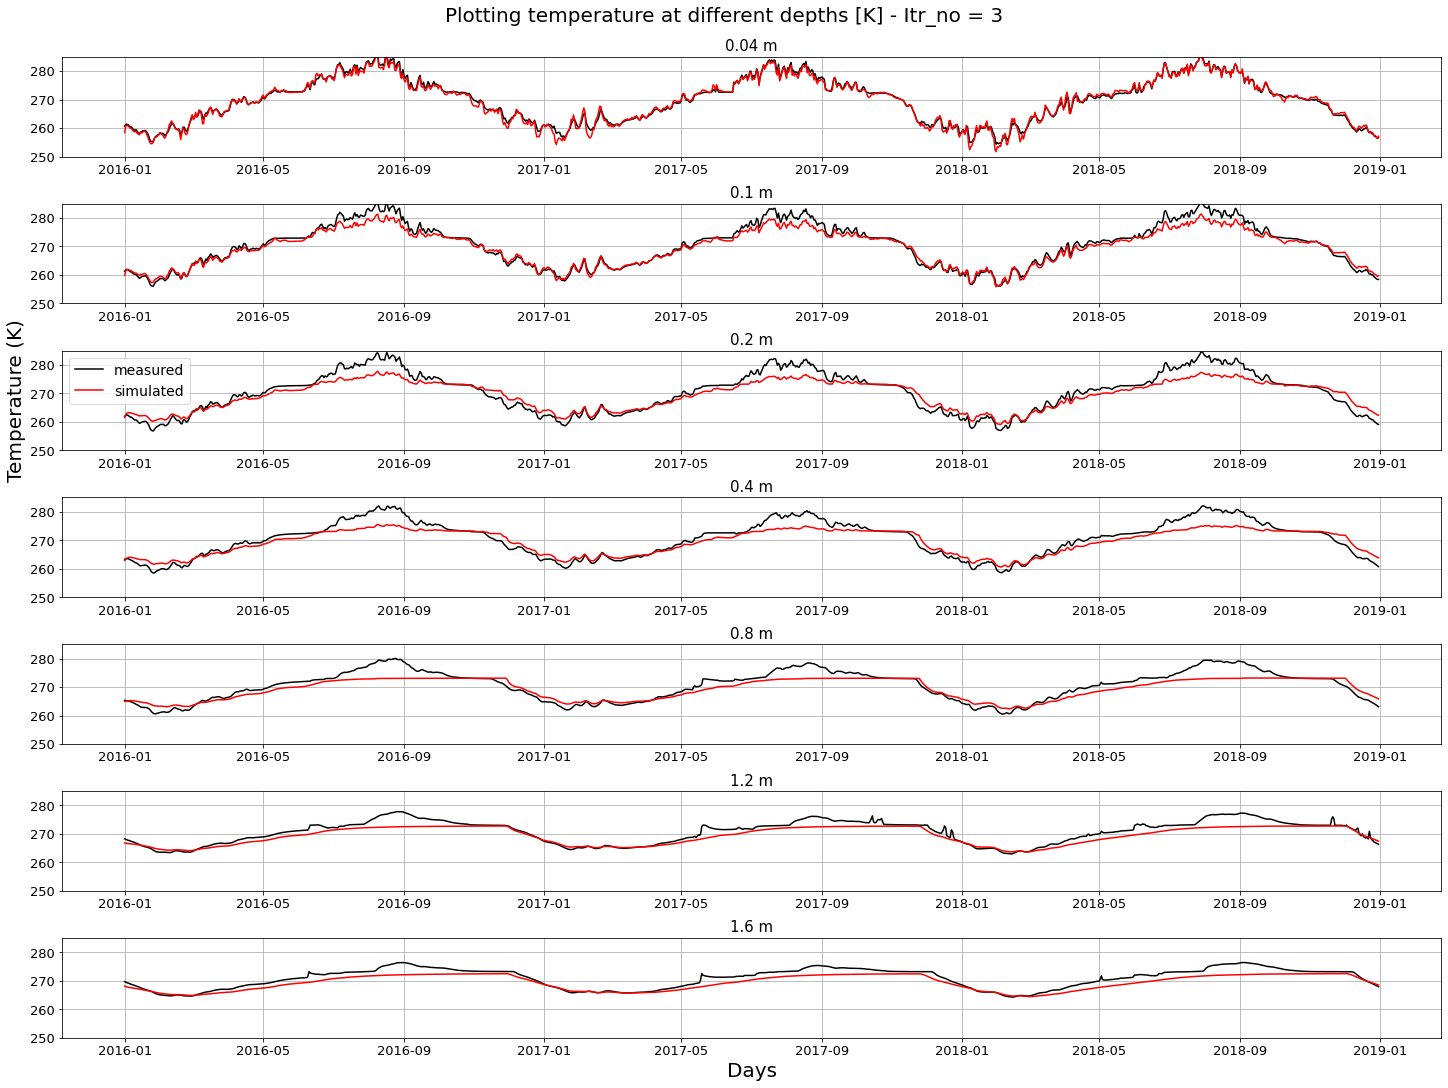

In [42]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

#time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil temperature at - {depth} m (K)'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil temperature at - {depth} m (K)'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax7.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

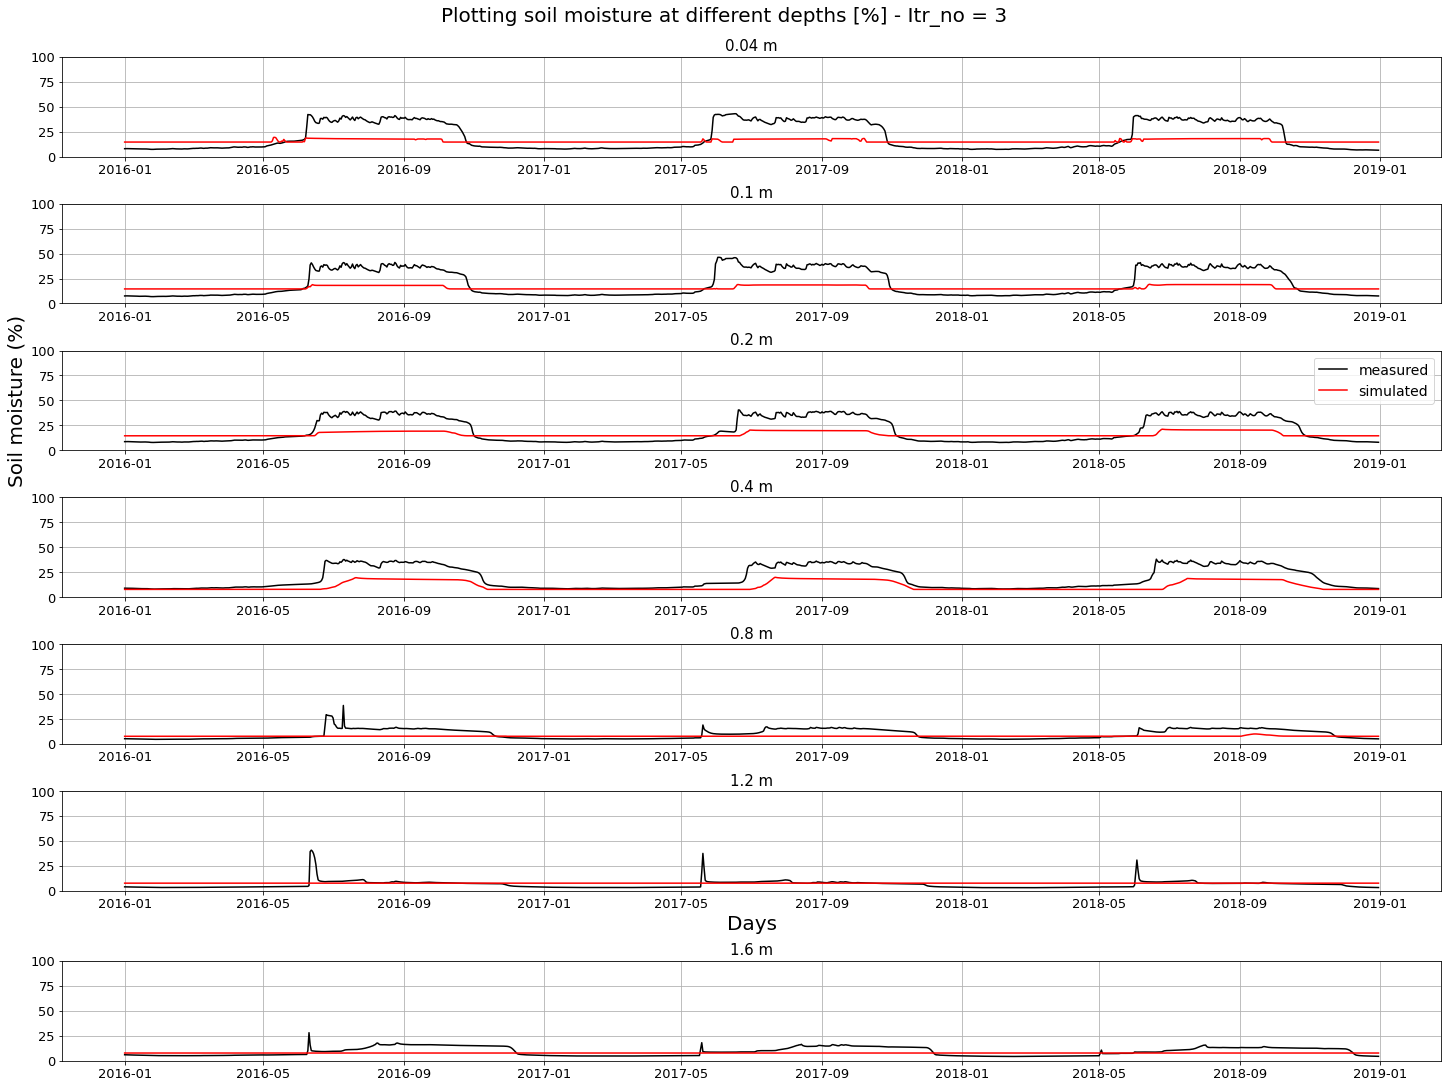

In [43]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [%] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)


for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil moisture at - {depth} m (%)'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Soil moisture (%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Looking closely for 1 year! - 2018

Text(0.5, 0, 'Days')

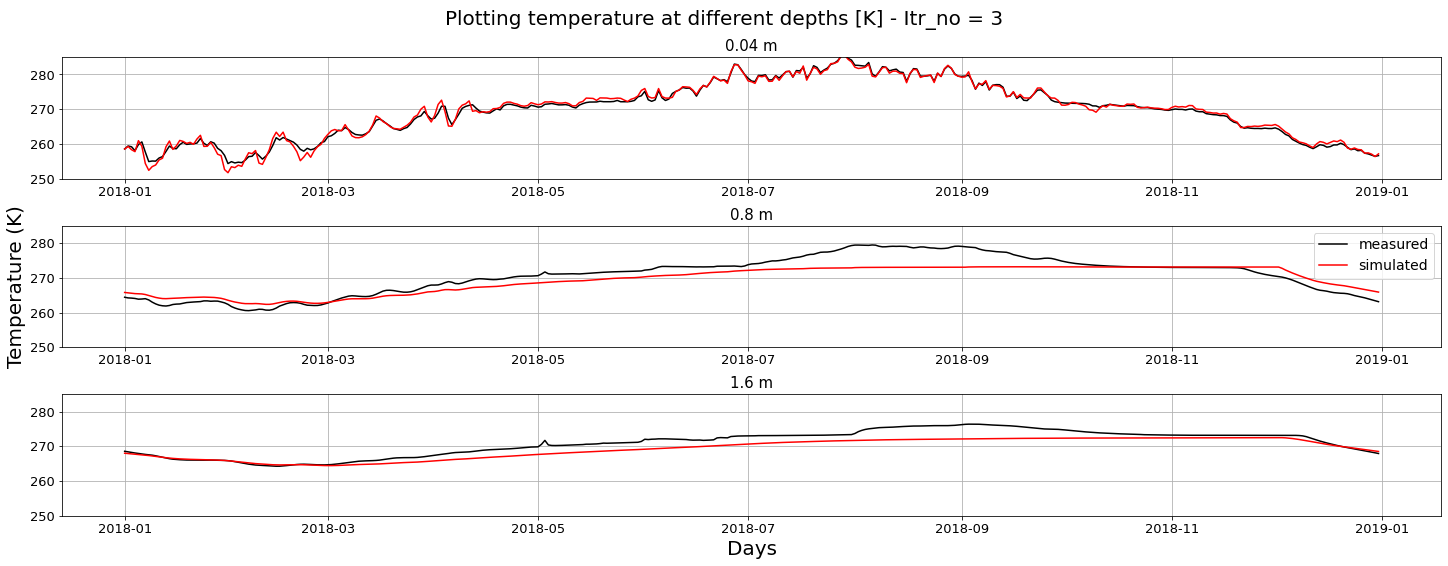

In [44]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])


fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.8, 1.6]

#time_period = np.arange(0,1096)


for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil temperature at - {depth} m (K)']['2018'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil temperature at - {depth} m (K)']['2018'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax2.legend(fontsize=14)  
f2_ax2.set_ylabel('Temperature (K)', fontsize=20)
f2_ax3.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

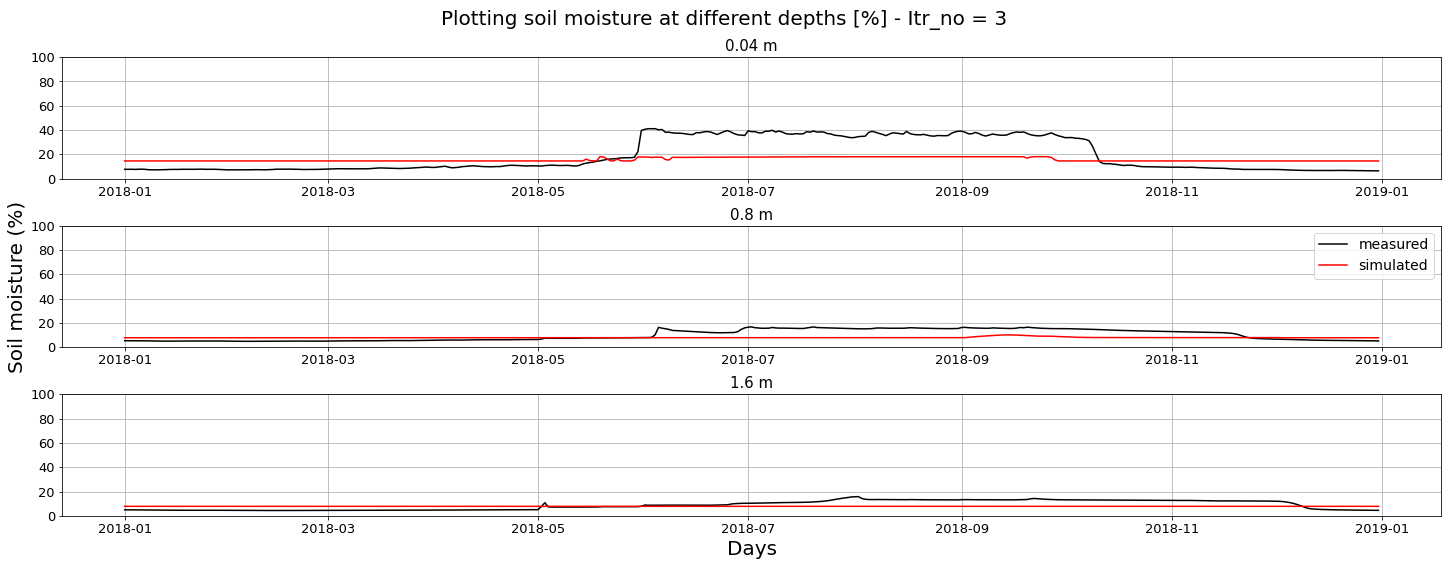

In [45]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])


fig2.suptitle(f'Plotting soil moisture at different depths [%] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.8, 1.6]

time_period = np.arange(0,1096)


for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)']['2018'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil moisture at - {depth} m (%)']['2018'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        

f2_ax2.legend(fontsize=14)  
f2_ax2.set_ylabel('Soil moisture (%)', fontsize=20)
f2_ax3.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. The estimates are such that the moisture is underestimated - The soil does not thaw that much in the above layers.

<Figure size 720x432 with 0 Axes>

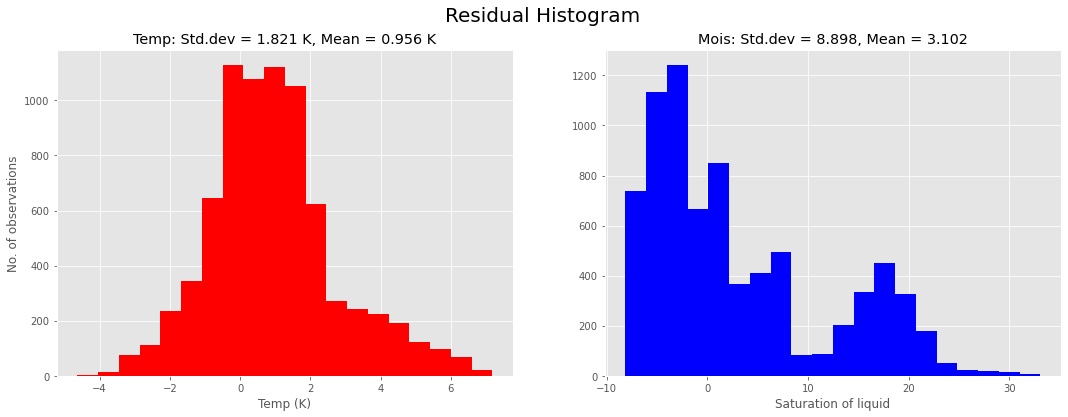

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [47]:
temp_res.describe()

count    7672.000000
mean        0.956096
std         1.820865
min        -4.631238
25%        -0.192044
50%         0.786378
75%         1.833492
max         7.183092
Name: Residual, dtype: float64

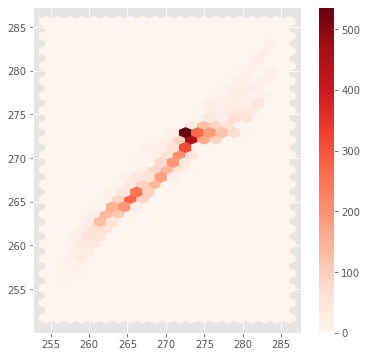

In [48]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

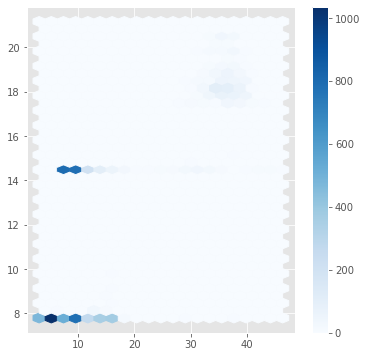

In [49]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

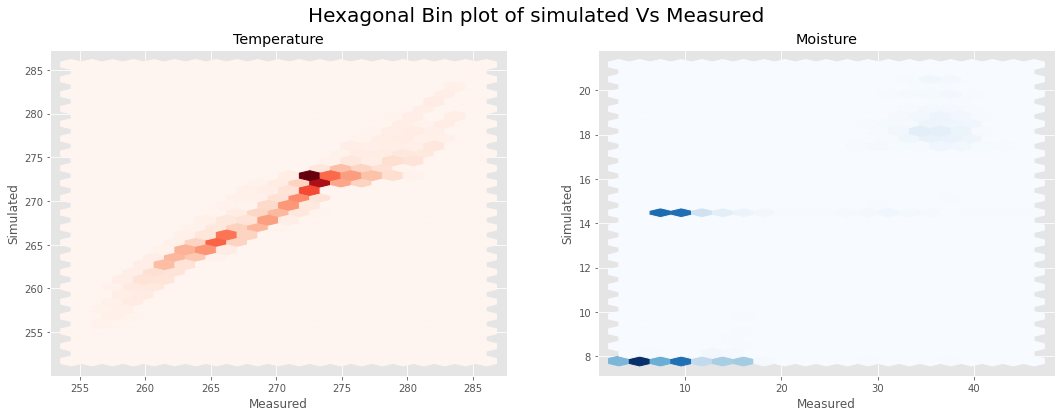

In [50]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [51]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.003564,0.003564,0,0.001782,0.001782
1,32,0.003449,0.003449,0,0.001765,0.001685
2,63,0.003238,0.003238,0,0.001732,0.001507
3,115,0.003238,0.003238,0,0.001732,0.001507
4,167,0.003238,0.003238,0,0.001732,0.001507


In [52]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([1731.66, 1506.58])

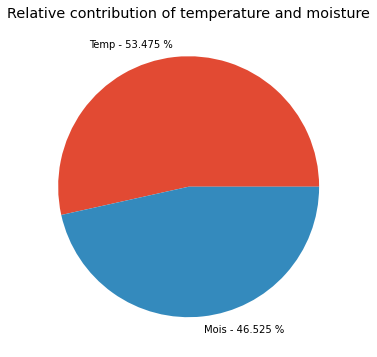

In [53]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

### How does the best parameters look like? Are they plausible? How do they compare with the other cases? Do we go for the case with optimal value or a case that shows more physical possibility?

In [54]:
itrno_best

3

In [55]:
par_iteration.loc[itrno_best,:]

alpha_p    2.500000e-03
alpha_m    1.813810e-03
n_p        2.049690e+00
n_m        2.050030e+00
wr_p       2.280230e-01
wr_m       1.617820e-01
tcs_p      4.423370e-01
tcs_m      9.517930e-01
tcd_p      1.037000e-01
tcd_m      9.842390e-01
af_p       1.505070e+00
af_m       1.499410e+00
auf_p      4.857370e-01
auf_m      6.988840e-01
por_p      6.384080e-01
por_m      4.816380e-01
perm_p     1.336660e-11
perm_m     1.187990e-13
den_p      9.000000e+02
den_m      1.900000e+03
b_bc       2.684500e+02
Name: 3, dtype: float64

### Exporting the values:

The values are mainly exported for the best iteration i.e. with the least objective function.

In [56]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs_su'

#### 1. Parameters:

In [58]:
### Best parameters:
best_params = par_iteration.loc[itrno_best,:]
### Saving it as a csv file
best_params.to_csv('Final_comp_cases_data/best_params_Case1_su_cv_rw.csv',sep=',')

#### 2. Residuals - Temperature and moisture

In [59]:
res_best.to_csv('Final_comp_cases_data/best_res_Case1_su_cv_rw.csv',sep=',')
Yakou_mesdata_concise.to_csv('Final_comp_cases_data/mes_data_Case1_su_cv_rw.csv',sep=',')
case1_best_sim.to_csv('Final_comp_cases_data/finalsim_Case1_su_cv_rw.csv',sep=',')

#### 3. Objective function

In [60]:
obj_iteration.to_csv('Final_comp_cases_data/obj_fn_Case1_su_cv_rw.csv',sep=',')

#### 4. Parameter sensitivity - best

In [61]:
sen_best = sen_iteration.loc[itrno_best,:]
sen_best.to_csv('Final_comp_cases_data/best_sen_Case1_su_cv_rw.csv',sep=',')

#### f. Identifibility tool - Identifiability is defined here as the capability of model calibration to constrain parameters used by a model.
- Go through the article and extract results later!

#### g. Plotting the covariance matrix for the variables